In [ ]:
"""
We want to implement the Node2Vec algorithm.
Instead of using purely random walks, Node2Vec employs a biased random walk that controlled by p and q.
Parameters p is the return parameter and q is the in-out parameter.
DeepWalk treats all transitions uniformly.
Node2Vec’s implementation requires only defining p and q to interpolate between BFS and DFS exploration.
"""

In [1]:
# 1. Load a dataset (graph: Zachary's karate club)
import networkx as nx

graph_karate_club = nx.karate_club_graph()

In [2]:
# 1.1. Get the labels of karate club. It has two labels: "Mr. Hi" and "Officer"
labels = [1 if graph_karate_club.nodes[i]['club']=='Officer' else 0 for i in graph_karate_club.nodes()]
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


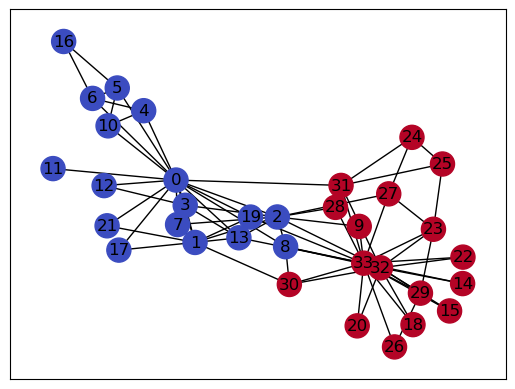

In [3]:
# 1.2 Plot the graph
layput_position = nx.spring_layout(graph_karate_club)
nx.draw_networkx(graph_karate_club, pos = layput_position, node_color = labels, cmap = 'coolwarm')

In [4]:
# 2. Initialize Node2Vec model
from karateclub import Node2Vec
Node2VecModel = Node2Vec(walk_number=10, walk_length=40, p=0.6, q=0.4, dimensions=128)

In [5]:
# 3. Fit the model
Node2VecModel.fit(graph_karate_club)

In [6]:
# 4. Get node embeddings (each node -> 128-dim vector)
embedding = Node2VecModel.get_embedding()

# We have 34 vertexes and in the creation of Node2Vec model we used 128 dimenstion for embedding of each vertex 
print('The embedding model has the following shape: ', embedding.shape)

The embedding model has the following shape:  (34, 128)


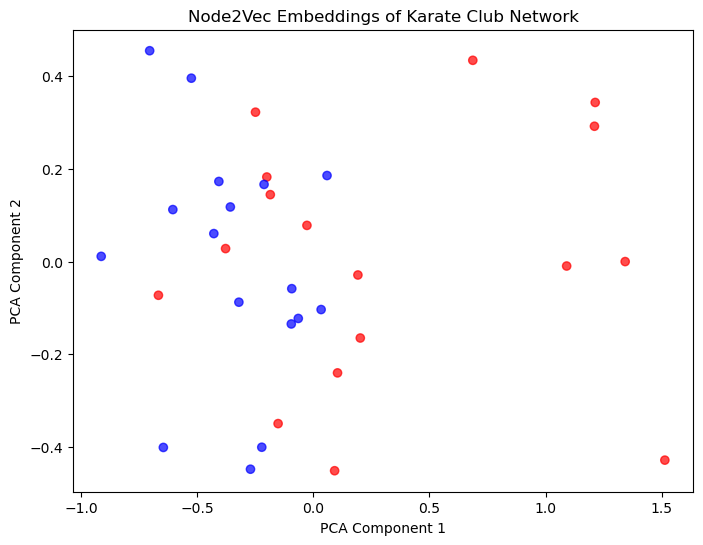

In [7]:
# 4.1 Visualize the embeddings (2D projection)
import sklearn
import matplotlib.pyplot as plt

pca = sklearn.decomposition.PCA(n_components=2)
emb_2d = pca.fit_transform(embedding)
colors = ['red' if graph_karate_club.nodes[i]['club'] == 'Mr. Hi' else 'blue' for i in graph_karate_club.nodes()]

plt.figure(figsize=(8, 6))
plt.scatter(emb_2d[:, 0], emb_2d[:, 1], c=colors, alpha=0.7)
plt.title("Node2Vec Embeddings of Karate Club Network")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [8]:
# 5. Split data into train/test sets (80/20)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    embedding,
    labels,
    test_size=0.2
)

In [9]:
# 6. Train a classifier
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [10]:
# 6. Evaluate performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_preds = clf.predict(X_test)

print(f"Verified Test Accuracy: {accuracy_score(y_test, y_preds):.2f}\n")

print("Classification Report:")
print(classification_report(y_test, y_preds))

Verified Test Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.75      0.86         4

    accuracy                           0.86         7
   macro avg       0.88      0.88      0.86         7
weighted avg       0.89      0.86      0.86         7

